In \[13\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore")

In \[2\]:

    df=pd.read_csv("cars.csv")
    df.head()

Out\[2\]:

|     | symboling | normalized-losses | make        | fuel-type | body-style  | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------------|-----------|-------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 0   | 3         | ?                 | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111        | 21       | 27          | 13495 |
| 1   | 3         | ?                 | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111        | 21       | 27          | 16500 |
| 2   | 1         | ?                 | alfa-romero | gas       | hatchback   | rwd          | front           | 65.5  | 52.4   | ohcv        | 152         | 154        | 19       | 26          | 16500 |
| 3   | 2         | 164               | audi        | gas       | sedan       | fwd          | front           | 66.2  | 54.3   | ohc         | 109         | 102        | 24       | 30          | 13950 |
| 4   | 2         | 164               | audi        | gas       | sedan       | 4wd          | front           | 66.4  | 54.3   | ohc         | 136         | 115        | 18       | 22          | 17450 |

# Handle the Missing values<a href="#Handle-the-Missing-values" class="anchor-link">¶</a>

In \[3\]:

    df.isna().sum()

Out\[3\]:

    symboling            0
    normalized-losses    0
    make                 0
    fuel-type            0
    body-style           0
    drive-wheels         0
    engine-location      0
    width                0
    height               0
    engine-type          0
    engine-size          0
    horsepower           0
    city-mpg             0
    highway-mpg          0
    price                0
    dtype: int64

In \[4\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 205 entries, 0 to 204
    Data columns (total 15 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   symboling          205 non-null    int64  
     1   normalized-losses  205 non-null    object 
     2   make               205 non-null    object 
     3   fuel-type          205 non-null    object 
     4   body-style         205 non-null    object 
     5   drive-wheels       205 non-null    object 
     6   engine-location    205 non-null    object 
     7   width              205 non-null    float64
     8   height             205 non-null    float64
     9   engine-type        205 non-null    object 
     10  engine-size        205 non-null    int64  
     11  horsepower         205 non-null    object 
     12  city-mpg           205 non-null    int64  
     13  highway-mpg        205 non-null    int64  
     14  price              205 non-null    int64  
    dtypes: float64(2), int64(5), object(8)
    memory usage: 24.1+ KB

In \[5\]:

    df["normalized-losses"].unique()

Out\[5\]:

    array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
           '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
           '150', '129', '115', '93', '142', '161', '153', '125', '128',
           '122', '103', '168', '108', '194', '231', '119', '154', '74',
           '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
           '90', '94', '256', '95'], dtype=object)

In \[6\]:

    df["horsepower"].unique()

Out\[6\]:

    array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
           '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
           '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
           '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
           '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
           '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
           '106'], dtype=object)

In \[8\]:

    df["horsepower"].replace("?", np.nan, inplace=True)
    df["normalized-losses"].replace("?", np.nan, inplace=True)


    df["horsepower"]=df["horsepower"].astype("float")
    df["normalized-losses"]=df["normalized-losses"].astype("float")


    hmean=df["horsepower"].mean()
    nmean = df["normalized-losses"].mean()


    df["horsepower"].fillna(hmean, inplace=True)
    df["normalized-losses"].fillna(nmean, inplace=True)

In \[9\]:

    df.head()

Out\[9\]:

|     | symboling | normalized-losses | make        | fuel-type | body-style  | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------------|-----------|-------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 0   | 3         | 122.0             | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111.0      | 21       | 27          | 13495 |
| 1   | 3         | 122.0             | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111.0      | 21       | 27          | 16500 |
| 2   | 1         | 122.0             | alfa-romero | gas       | hatchback   | rwd          | front           | 65.5  | 52.4   | ohcv        | 152         | 154.0      | 19       | 26          | 16500 |
| 3   | 2         | 164.0             | audi        | gas       | sedan       | fwd          | front           | 66.2  | 54.3   | ohc         | 109         | 102.0      | 24       | 30          | 13950 |
| 4   | 2         | 164.0             | audi        | gas       | sedan       | 4wd          | front           | 66.4  | 54.3   | ohc         | 136         | 115.0      | 18       | 22          | 17450 |

In \[10\]:

    df.head()

Out\[10\]:

|     | symboling | normalized-losses | make        | fuel-type | body-style  | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------------|-----------|-------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 0   | 3         | 122.0             | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111.0      | 21       | 27          | 13495 |
| 1   | 3         | 122.0             | alfa-romero | gas       | convertible | rwd          | front           | 64.1  | 48.8   | dohc        | 130         | 111.0      | 21       | 27          | 16500 |
| 2   | 1         | 122.0             | alfa-romero | gas       | hatchback   | rwd          | front           | 65.5  | 52.4   | ohcv        | 152         | 154.0      | 19       | 26          | 16500 |
| 3   | 2         | 164.0             | audi        | gas       | sedan       | fwd          | front           | 66.2  | 54.3   | ohc         | 109         | 102.0      | 24       | 30          | 13950 |
| 4   | 2         | 164.0             | audi        | gas       | sedan       | 4wd          | front           | 66.4  | 54.3   | ohc         | 136         | 115.0      | 18       | 22          | 17450 |

In \[11\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 205 entries, 0 to 204
    Data columns (total 15 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   symboling          205 non-null    int64  
     1   normalized-losses  205 non-null    float64
     2   make               205 non-null    object 
     3   fuel-type          205 non-null    object 
     4   body-style         205 non-null    object 
     5   drive-wheels       205 non-null    object 
     6   engine-location    205 non-null    object 
     7   width              205 non-null    float64
     8   height             205 non-null    float64
     9   engine-type        205 non-null    object 
     10  engine-size        205 non-null    int64  
     11  horsepower         205 non-null    float64
     12  city-mpg           205 non-null    int64  
     13  highway-mpg        205 non-null    int64  
     14  price              205 non-null    int64  
    dtypes: float64(4), int64(5), object(6)
    memory usage: 24.1+ KB

# Remove all the outliers if exists in the dataset<a href="#Remove-all-the-outliers-if-exists-in-the-dataset" class="anchor-link">¶</a>

In \[14\]:

    sns.boxplot(data=df, x="price", y="make")
    plt.grid(True)

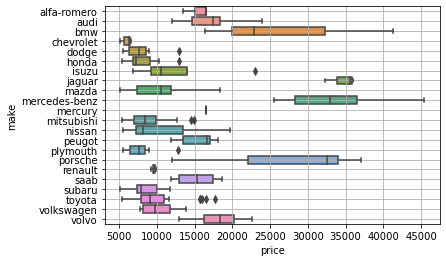

In \[15\]:

    df[(df["make"]=="dodge") & (df["price"]>11000)]

Out\[15\]:

|     | symboling | normalized-losses | make  | fuel-type | body-style | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------|-----------|------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 29  | 3         | 145.0             | dodge | gas       | hatchback  | fwd          | front           | 66.3  | 50.2   | ohc         | 156         | 145.0      | 19       | 24          | 12964 |

In \[16\]:

    df.drop(29, inplace=True)

In \[17\]:

    df[(df["make"]=="honda") & (df["price"]>11000)]

Out\[17\]:

|     | symboling | normalized-losses | make  | fuel-type | body-style | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------|-----------|------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 41  | 0         | 85.0              | honda | gas       | sedan      | fwd          | front           | 65.2  | 54.1   | ohc         | 110         | 101.0      | 24       | 28          | 12945 |

In \[18\]:

    df.drop(41, inplace=True)

In \[19\]:

    df[(df["make"]=="isuzu") & (df["price"]>21000)]

Out\[19\]:

|     | symboling | normalized-losses | make  | fuel-type | body-style | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------|-----------|------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 45  | 0         | 122.0             | isuzu | gas       | sedan      | fwd          | front           | 63.6  | 52.0   | ohc         | 90          | 70.0       | 38       | 43          | 23000 |

In \[20\]:

    df.drop(45, inplace=True)

In \[21\]:

    df[(df["make"]=="mitsubishi") & (df["price"]>11000)]

Out\[21\]:

|     | symboling | normalized-losses | make       | fuel-type | body-style | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|------------|-----------|------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 82  | 3         | 122.0             | mitsubishi | gas       | hatchback  | fwd          | front           | 66.3  | 50.2   | ohc         | 156         | 145.0      | 19       | 24          | 12629 |
| 83  | 3         | 122.0             | mitsubishi | gas       | hatchback  | fwd          | front           | 66.3  | 50.2   | ohc         | 156         | 145.0      | 19       | 24          | 14869 |
| 84  | 3         | 122.0             | mitsubishi | gas       | hatchback  | fwd          | front           | 66.3  | 50.2   | ohc         | 156         | 145.0      | 19       | 24          | 14489 |

In \[22\]:

    df.drop([82,83,84], inplace=True)

In \[23\]:

    df[(df["make"]=="plymouth") & (df["price"]>11000)]

Out\[23\]:

|     | symboling | normalized-losses | make     | fuel-type | body-style | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|----------|-----------|------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 124 | 3         | 122.0             | plymouth | gas       | hatchback  | rwd          | front           | 66.3  | 50.2   | ohc         | 156         | 145.0      | 19       | 24          | 12764 |

In \[24\]:

    df.drop(124, inplace=True)

In \[25\]:

    df[(df["make"]=="toyota") & (df["price"]>15000)]

Out\[25\]:

|     | symboling | normalized-losses | make   | fuel-type | body-style  | drive-wheels | engine-location | width | height | engine-type | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|--------|-----------|-------------|--------------|-----------------|-------|--------|-------------|-------------|------------|----------|-------------|-------|
| 172 | 2         | 134.0             | toyota | gas       | convertible | rwd          | front           | 65.6  | 53.0   | ohc         | 146         | 116.0      | 24       | 30          | 17669 |
| 178 | 3         | 197.0             | toyota | gas       | hatchback   | rwd          | front           | 67.7  | 52.0   | dohc        | 171         | 161.0      | 20       | 24          | 16558 |
| 179 | 3         | 197.0             | toyota | gas       | hatchback   | rwd          | front           | 67.7  | 52.0   | dohc        | 171         | 161.0      | 19       | 24          | 15998 |
| 180 | -1        | 90.0              | toyota | gas       | sedan       | rwd          | front           | 66.5  | 54.1   | dohc        | 171         | 156.0      | 20       | 24          | 15690 |
| 181 | -1        | 122.0             | toyota | gas       | wagon       | rwd          | front           | 66.5  | 54.1   | dohc        | 161         | 156.0      | 19       | 24          | 15750 |

In \[26\]:

    df.drop([172,178,179,180,181], inplace=True)

In \[27\]:

    sns.boxplot(data=df, x="price", y="make")
    plt.grid(True)

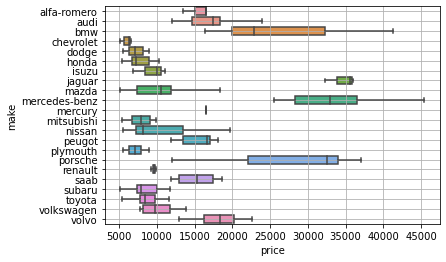

# Use Encoding and encode all the categorical data<a href="#Use-Encoding-and-encode-all-the-categorical-data" class="anchor-link">¶</a>

In \[29\]:

    from sklearn.preprocessing import LabelEncoder

In \[30\]:

    df_cat=df.select_dtypes(object)
    df_cat

Out\[30\]:

|     | make        | fuel-type | body-style  | drive-wheels | engine-location | engine-type |
|-----|-------------|-----------|-------------|--------------|-----------------|-------------|
| 0   | alfa-romero | gas       | convertible | rwd          | front           | dohc        |
| 1   | alfa-romero | gas       | convertible | rwd          | front           | dohc        |
| 2   | alfa-romero | gas       | hatchback   | rwd          | front           | ohcv        |
| 3   | audi        | gas       | sedan       | fwd          | front           | ohc         |
| 4   | audi        | gas       | sedan       | 4wd          | front           | ohc         |
| ... | ...         | ...       | ...         | ...          | ...             | ...         |
| 200 | volvo       | gas       | sedan       | rwd          | front           | ohc         |
| 201 | volvo       | gas       | sedan       | rwd          | front           | ohc         |
| 202 | volvo       | gas       | sedan       | rwd          | front           | ohcv        |
| 203 | volvo       | diesel    | sedan       | rwd          | front           | ohc         |
| 204 | volvo       | gas       | sedan       | rwd          | front           | ohc         |

193 rows × 6 columns

In \[31\]:

    df_num=df.select_dtypes(["int64","float64"])
    df_num

Out\[31\]:

|     | symboling | normalized-losses | width | height | engine-size | horsepower | city-mpg | highway-mpg | price |
|-----|-----------|-------------------|-------|--------|-------------|------------|----------|-------------|-------|
| 0   | 3         | 122.0             | 64.1  | 48.8   | 130         | 111.0      | 21       | 27          | 13495 |
| 1   | 3         | 122.0             | 64.1  | 48.8   | 130         | 111.0      | 21       | 27          | 16500 |
| 2   | 1         | 122.0             | 65.5  | 52.4   | 152         | 154.0      | 19       | 26          | 16500 |
| 3   | 2         | 164.0             | 66.2  | 54.3   | 109         | 102.0      | 24       | 30          | 13950 |
| 4   | 2         | 164.0             | 66.4  | 54.3   | 136         | 115.0      | 18       | 22          | 17450 |
| ... | ...       | ...               | ...   | ...    | ...         | ...        | ...      | ...         | ...   |
| 200 | -1        | 95.0              | 68.9  | 55.5   | 141         | 114.0      | 23       | 28          | 16845 |
| 201 | -1        | 95.0              | 68.8  | 55.5   | 141         | 160.0      | 19       | 25          | 19045 |
| 202 | -1        | 95.0              | 68.9  | 55.5   | 173         | 134.0      | 18       | 23          | 21485 |
| 203 | -1        | 95.0              | 68.9  | 55.5   | 145         | 106.0      | 26       | 27          | 22470 |
| 204 | -1        | 95.0              | 68.9  | 55.5   | 141         | 114.0      | 19       | 25          | 22625 |

193 rows × 9 columns

In \[32\]:

    for col in df_cat:
        le=LabelEncoder()
        df_cat[col]=le.fit_transform(df_cat[col])

In \[33\]:

    df_cat

Out\[33\]:

|     | make | fuel-type | body-style | drive-wheels | engine-location | engine-type |
|-----|------|-----------|------------|--------------|-----------------|-------------|
| 0   | 0    | 1         | 0          | 2            | 0               | 0           |
| 1   | 0    | 1         | 0          | 2            | 0               | 0           |
| 2   | 0    | 1         | 2          | 2            | 0               | 5           |
| 3   | 1    | 1         | 3          | 1            | 0               | 3           |
| 4   | 1    | 1         | 3          | 0            | 0               | 3           |
| ... | ...  | ...       | ...        | ...          | ...             | ...         |
| 200 | 21   | 1         | 3          | 2            | 0               | 3           |
| 201 | 21   | 1         | 3          | 2            | 0               | 3           |
| 202 | 21   | 1         | 3          | 2            | 0               | 5           |
| 203 | 21   | 0         | 3          | 2            | 0               | 3           |
| 204 | 21   | 1         | 3          | 2            | 0               | 3           |

193 rows × 6 columns

# Handle the Skewness if exists in the dataset<a href="#Handle-the-Skewness-if-exists-in-the-dataset" class="anchor-link">¶</a>

In \[34\]:

    newdf = pd.concat([df_num,df_cat],axis=1)

In \[35\]:

    from scipy.stats import skew

In \[36\]:

    for col in df_num:
        print(col)
        print(skew(df_num[col]))
        plt.figure()
        sns.distplot(df_num[col])
        plt.show()

    symboling
    0.2147470605758054

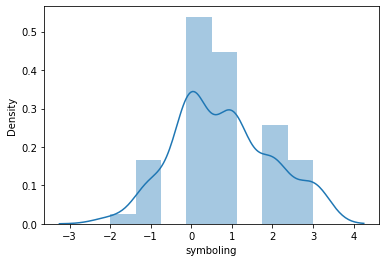

    normalized-losses
    0.846315331460635

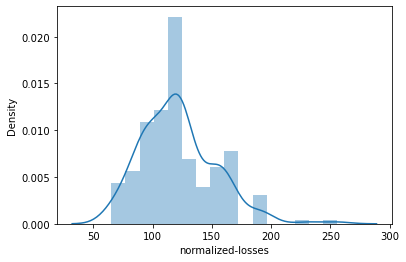

    width
    0.9147899492639983

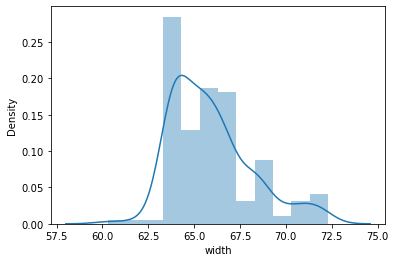

    height
    0.007986794777796822

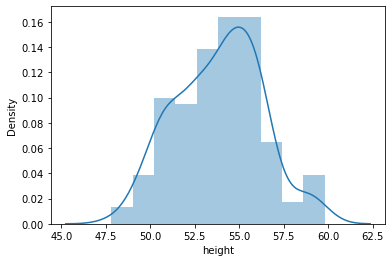

    engine-size
    2.0664919440355707

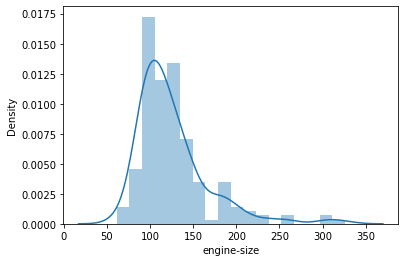

    horsepower
    1.576213559993105

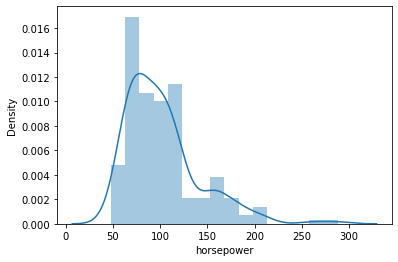

    city-mpg
    0.5925146641287237

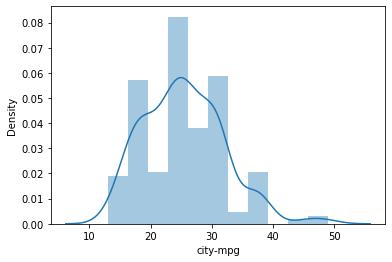

    highway-mpg
    0.4682909445793763

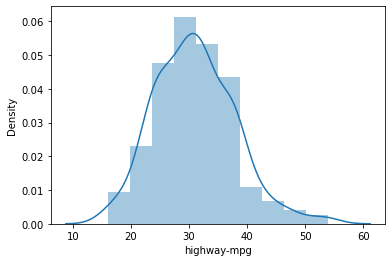

    price
    1.8111556001787903

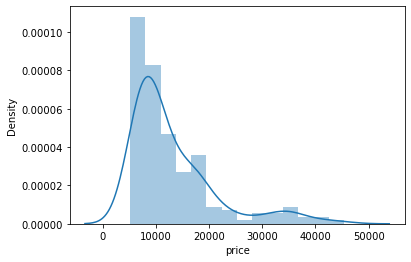

In \[37\]:

    df_num.corr()["price"].sort_values()

Out\[37\]:

    highway-mpg         -0.707051
    city-mpg            -0.682415
    symboling           -0.096215
    normalized-losses    0.129980
    height               0.147417
    width                0.730630
    horsepower           0.771608
    engine-size          0.871044
    price                1.000000
    Name: price, dtype: float64

In \[38\]:

    df_num["normalized-losses"]=np.log(df_num["normalized-losses"])

In \[39\]:

    skew(df_num["normalized-losses"])

Out\[39\]:

    0.020674302162479046

# Perform normalization on the dataset<a href="#Perform-normalization-on-the-dataset" class="anchor-link">¶</a>

In \[40\]:

    from sklearn.preprocessing import StandardScaler

In \[42\]:

    for col in newdf:
        sc = StandardScaler()
        newdf[col]=sc.fit_transform(newdf[[col]])

In \[43\]:

    newdf.head()

Out\[43\]:

|     | symboling | normalized-losses | width     | height    | engine-size | horsepower | city-mpg  | highway-mpg | price    | make      | fuel-type | body-style | drive-wheels | engine-location | engine-type |
|-----|-----------|-------------------|-----------|-----------|-------------|------------|-----------|-------------|----------|-----------|-----------|------------|--------------|-----------------|-------------|
| 0   | 1.867513  | 0.019137          | -0.817748 | -2.071007 | 0.107874    | 0.224311   | -0.680796 | -0.585808   | 0.050194 | -1.930113 | 0.34001   | -3.112000  | 1.229517     | -0.125656       | -3.103277   |
| 1   | 1.867513  | 0.019137          | -0.817748 | -2.071007 | 0.107874    | 0.224311   | -0.680796 | -0.585808   | 0.422324 | -1.930113 | 0.34001   | -3.112000  | 1.229517     | -0.125656       | -3.103277   |
| 2   | 0.187187  | 0.019137          | -0.178224 | -0.591990 | 0.631937    | 1.321612   | -0.987075 | -0.731505   | 0.422324 | -1.930113 | 0.34001   | -0.752016  | 1.229517     | -0.125656       | 1.938242    |
| 3   | 1.027350  | 1.356450          | 0.141538  | 0.188602  | -0.392369   | -0.005357  | -0.221378 | -0.148717   | 0.106540 | -1.771124 | 0.34001   | 0.427976   | -0.568186    | -0.125656       | -0.078366   |
| 4   | 1.027350  | 1.356450          | 0.232898  | 0.188602  | 0.250800    | 0.326386   | -1.140215 | -1.314294   | 0.539969 | -1.771124 | 0.34001   | 0.427976   | -2.365889    | -0.125656       | -0.078366   |

# Perform Feature engineering.<a href="#Perform-Feature-engineering." class="anchor-link">¶</a>

In \[50\]:

    newdf["Area"]=newdf["width"]*newdf["height"]
    newdf.drop(["width","height"],axis=1,inplace=True)

In \[51\]:

    newdf.head()

Out\[51\]:

|     | symboling | normalized-losses | engine-size | horsepower | city-mpg  | highway-mpg | price    | make      | fuel-type | body-style | drive-wheels | engine-location | engine-type | Area     |
|-----|-----------|-------------------|-------------|------------|-----------|-------------|----------|-----------|-----------|------------|--------------|-----------------|-------------|----------|
| 0   | 1.867513  | 0.019137          | 0.107874    | 0.224311   | -0.680796 | -0.585808   | 0.050194 | -1.930113 | 0.34001   | -3.112000  | 1.229517     | -0.125656       | -3.103277   | 1.693561 |
| 1   | 1.867513  | 0.019137          | 0.107874    | 0.224311   | -0.680796 | -0.585808   | 0.422324 | -1.930113 | 0.34001   | -3.112000  | 1.229517     | -0.125656       | -3.103277   | 1.693561 |
| 2   | 0.187187  | 0.019137          | 0.631937    | 1.321612   | -0.987075 | -0.731505   | 0.422324 | -1.930113 | 0.34001   | -0.752016  | 1.229517     | -0.125656       | 1.938242    | 0.105507 |
| 3   | 1.027350  | 1.356450          | -0.392369   | -0.005357  | -0.221378 | -0.148717   | 0.106540 | -1.771124 | 0.34001   | 0.427976   | -0.568186    | -0.125656       | -0.078366   | 0.026694 |
| 4   | 1.027350  | 1.356450          | 0.250800    | 0.326386   | -1.140215 | -1.314294   | 0.539969 | -1.771124 | 0.34001   | 0.427976   | -2.365889    | -0.125656       | -0.078366   | 0.043925 |

In \[ \]: